# Data Analysis 

In this part different features that can be extracted were observed. 

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [12]:
data = pd.read_csv('train.csv')

In [13]:
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [14]:
data.shape

(7613, 5)

# Given features

There are two extra features that are given: keyword and location. Both features have some NaN values. Let's have a look on the statistic about these features. 

In [44]:
print("Number of different keywords: ", train.keyword.count())
print("Number of NaN values: ", train.keyword.isna().sum())
train.keyword.value_counts()

Number of different keywords:  7552
Number of NaN values:  61


fatalities               45
armageddon               42
deluge                   42
harm                     41
body%20bags              41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

In [43]:
print("Number of different locations: ", train.location.count())
print("Number of NaN values: ", train.location.isna().sum())
train.location.value_counts()

Number of different locations:  5080
Number of NaN values:  2533


USA                    104
New York                71
United States           50
London                  45
Canada                  29
                      ... 
Kettering, OH            1
Wakanda                  1
We are global!           1
East Aurora, NY          1
North East, England      1
Name: location, Length: 3341, dtype: int64

Keyword has pretty smal number of Nan values. Now, let's have a looc if the statistic is different for data with target = 1. 

In [24]:
t_data = data[data.target == 1]
t_d  = t_data.location.value_counts()[:5]
d = data.location.value_counts()[:5]

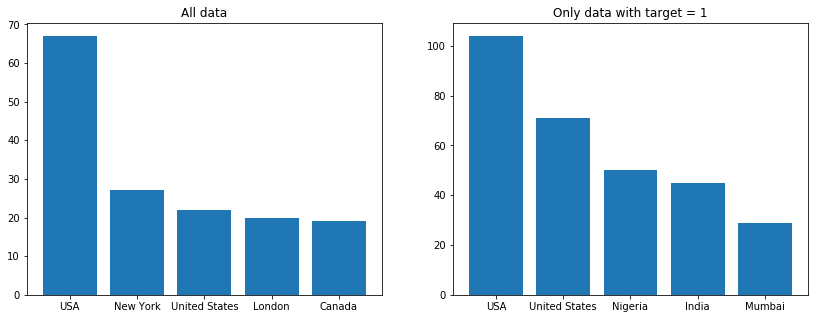

In [42]:
x = np.arange(5)
y = np.arange(5)

fig = plt.figure(figsize=(14,5))   
fig.add_subplot(121)            
plt.bar(x,t_d)     
plt.xticks(x, ('USA', 'New York', 'United States', 'London', 'Canada'))
plt.title('All data')

fig.add_subplot(122)           
plt.bar(x, d)  
plt.xticks(y, ('USA', 'United States', 'Nigeria', 'India', 'Mumbai'))
plt.title('Only data with target = 1')
plt.show() 

There are locations ‘United States’ and ‘USA’, which represent the same country. Interestingly, the countries that appear in top 5 only when target = 1 are developing countries and located by the water. 

# Extraction features from the text

Some ways, that users use to explain themself can help us to undertand if the message is realistic or not. 
Now we will compare the number of tweets with target = 1 and target = 0 according to the different features.

We started with looking at how many true and false values are in the dataset. 

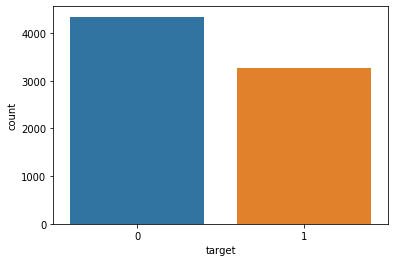

In [15]:
sns.countplot(x= 'target',data = train)

We can see that the number of tweets with fake information is more by about 1000. 

Now let's look at the distributions of the number of words in the tweets. 

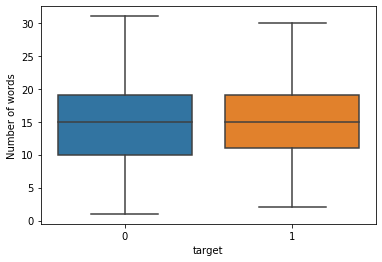

In [48]:
sns.boxplot('target', train['text'].str.split().str.len(), data = train)
plt.ylabel('Number of words')
plt.show()

The distributions looks very similar. There is no correlation between number of words and value of the target. 

The next feature can be the overuse of the capital letters and punctuation.

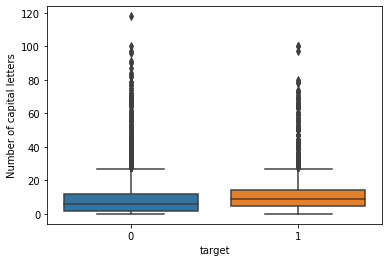

In [49]:
sns.boxplot('target', train['text'].str.findall(r'[A-Z]').str.len(), data = train)
plt.ylabel('Number of capital letters')
plt.show()

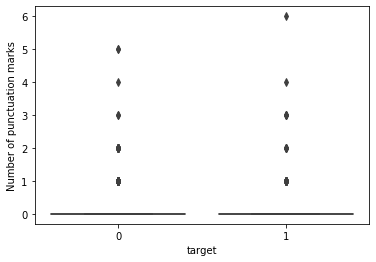

In [50]:
sns.boxplot('target', train['text'].str.findall(r'!!').str.len(), data = train)
plt.ylabel('Number of punctuation marks')
plt.show()

The boxplots above show that the overuse of punctuation or capital letters does not make a significant difference. 

Now let's see if tweets with links, @ or # belong to one class with bigger probability. 

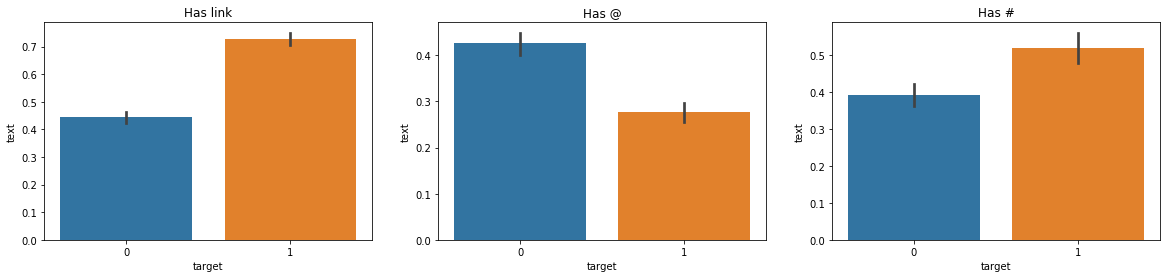

In [58]:
fig = plt.figure(figsize=(20,4))  

fig.add_subplot(131)            
sns.barplot('target', train['text'].str.findall(r'http://').str.len(), data = train)
plt.title('Has link')

fig.add_subplot(132)           
sns.barplot('target', train['text'].str.findall(r'@').str.len(), data = train)
plt.title('Has @')


fig.add_subplot(133)           
sns.barplot('target', train['text'].str.findall(r'#').str.len(), data = train)
plt.title('Has #')
plt.show()

# Results

In this part the analytsis of the data was made. 

The presents of the link and hashtag showed some impact on the classification. Therefore, these features will be added to the dataset.  